In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import glob as gb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing and splitting data

In [ ]:
Updatereport = pd.read_csv('finalData.csv')
x = pd.DataFrame(Updatereport.drop(['Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','HDI Value','Country'], axis = 1))
y = pd.DataFrame(Updatereport['Happiness score'])
z = pd.DataFrame(Updatereport['HDI Value'])
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size = 0.3)

#### x consists of the predictor variables 'GDP per capita', 'Social support', 'Healthy Life Expectancy'
#### - We chose these variables as they have demonstrated strong correlations with 'Happiness Score' as compared to the other variables (excluding HDI Value)
#### y = 'Happiness Score' - Response and Predictor variable

#### z = 'HDI Value' - Additional response variable to test 'Happiness Score'

## Model 1: Random Forest

### Predicting 'Happiness Score'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


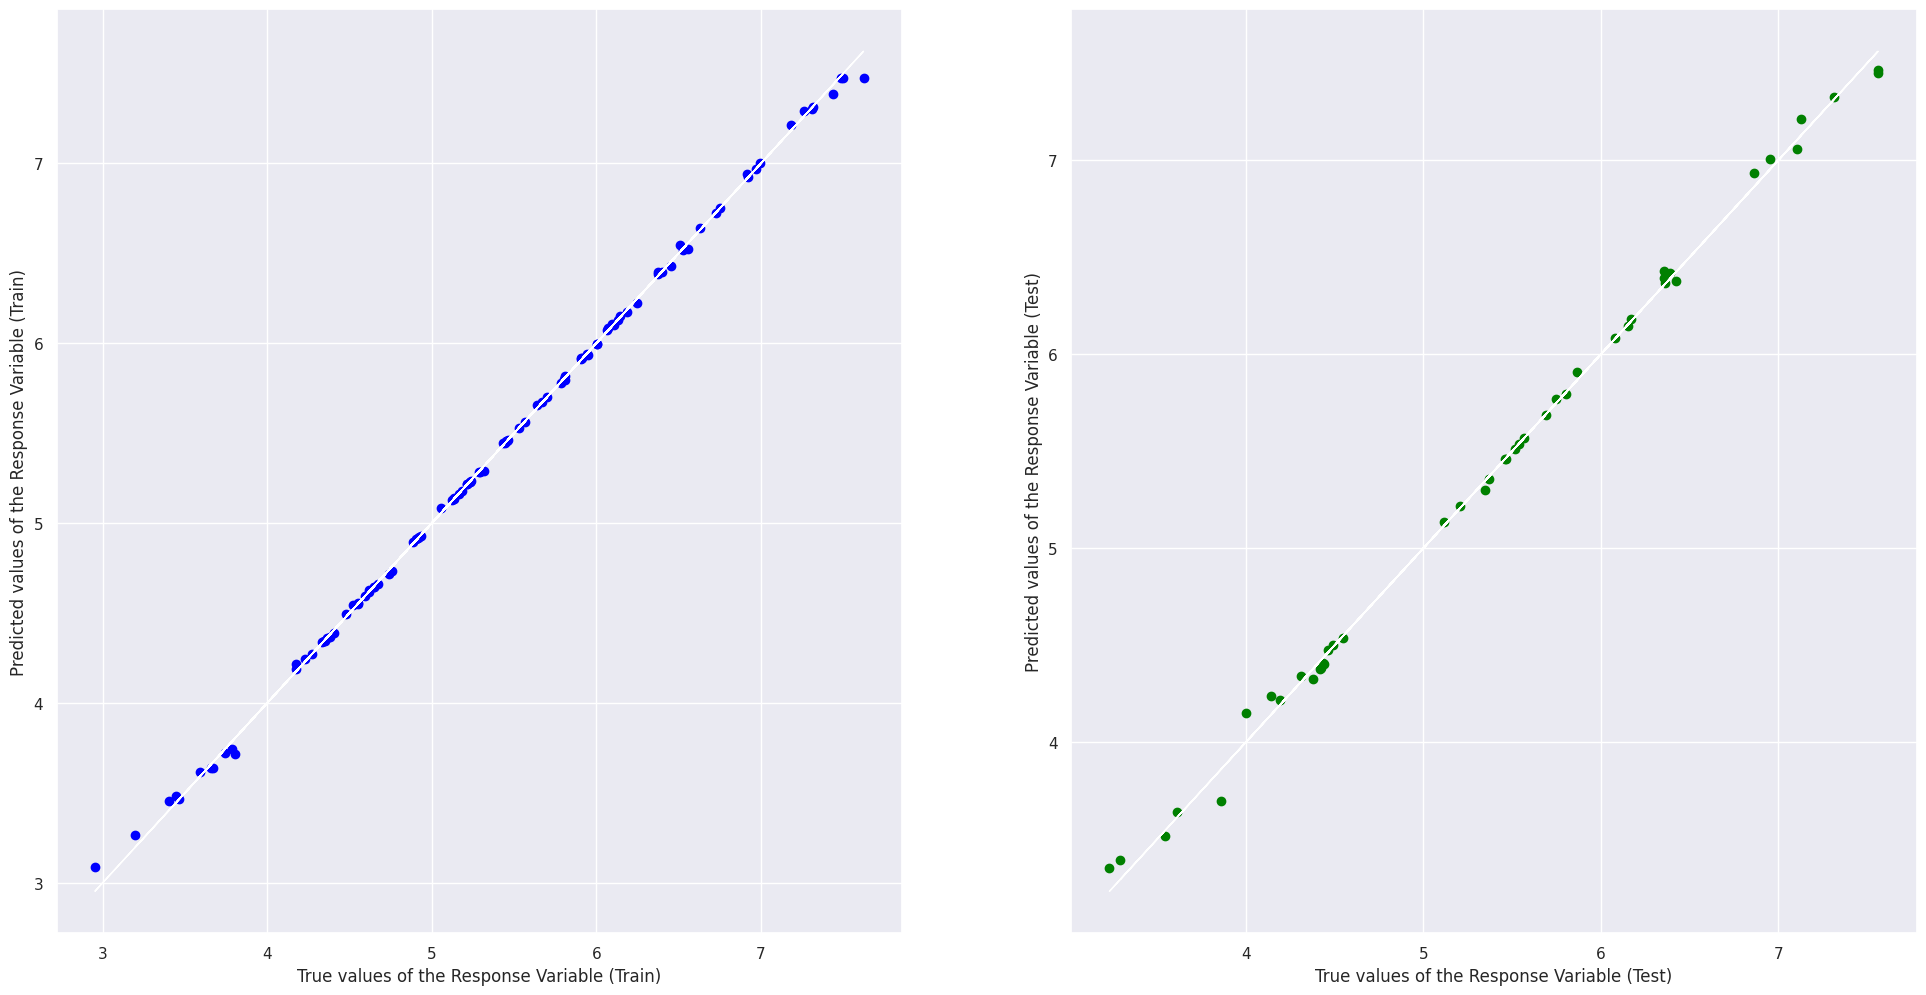

In [ ]:
# Create the Random Forest object
random_forest_model = RandomForestRegressor(n_estimators=30,max_depth=2,random_state=42)  
regress = RandomForestRegressor()
regress.fit(x_train, y_train)
y_train_pred = regress.predict(x_train)
y_test_pred = regress.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", regress.score(x_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(x_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9993451967130462
Mean Squared Error (MSE) on Train Set 	: 0.0007792619339805668
Explained Variance (R^2) on Test Set 	: 0.9976399361192672
Mean Squared Error (MSE) on Test Set 	: 0.003260138057777711


#### The R^2 being near 1 is expected, as in the original dataset, the response variable 'Happiness Score' is simply a summation of the other variables. Hence, as we used the top 3 variables with the highest correlation with 'Happiness Score' as the predictors in the model, it meets expectations that the R^2 is near 1.

#### The same explanation can be used to address the low MSE value being near zero.

### Predicting 'HDI Value' using 'Happiness Score'

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


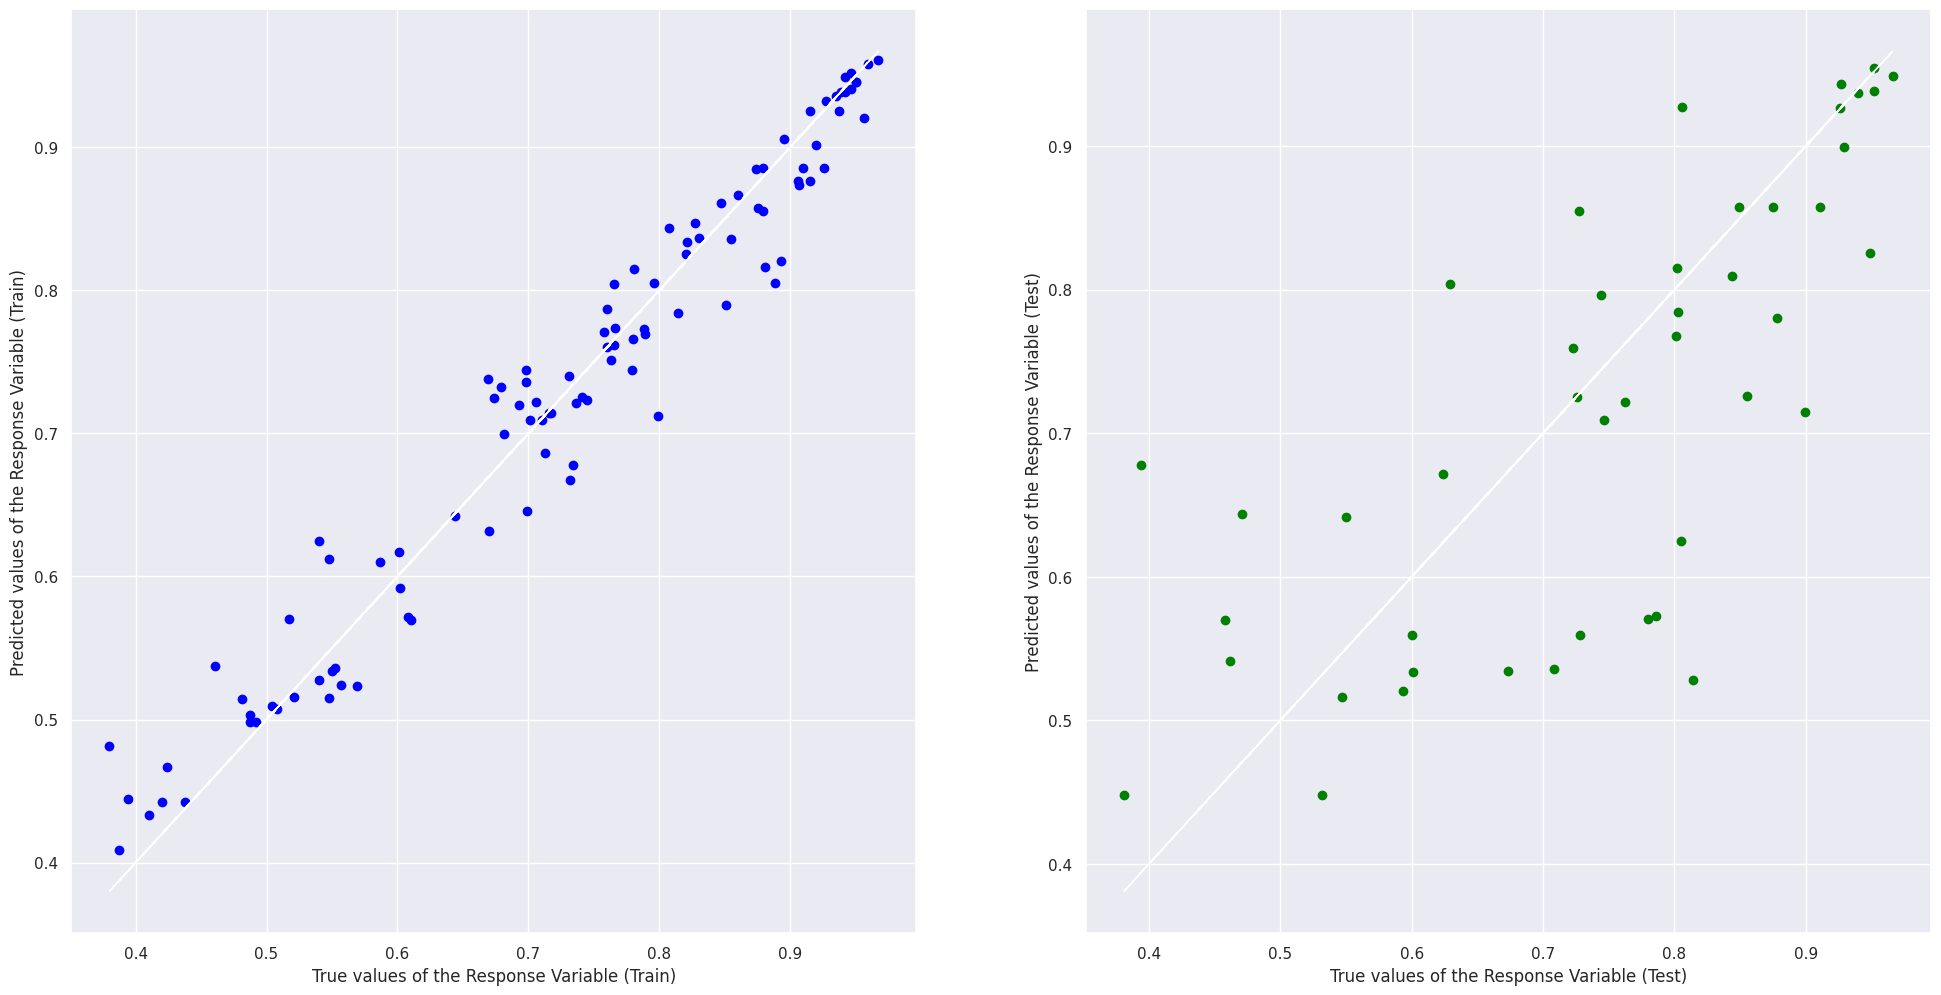

In [ ]:
# Create the Random Forest object
random_forest_model = RandomForestRegressor(n_estimators=30,max_depth=2,random_state=42)   
regress = RandomForestRegressor()
regress.fit(y_train, z_train)
z_train_pred = regress.predict(y_train)
z_test_pred = regress.predict(y_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(z_train, z_train_pred, color = "blue")
axes[0].plot(z_train, z_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(z_test, z_test_pred, color = "green")
axes[1].plot(z_test, z_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", regress.score(y_train, z_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(z_train, z_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(y_test, z_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(z_test, z_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9563105190843348
Mean Squared Error (MSE) on Train Set 	: 0.001176284753432036
Explained Variance (R^2) on Test Set 	: 0.4921976438575367
Mean Squared Error (MSE) on Test Set 	: 0.013249352383466705


#### The R^2 is near 1 but lower than that of the prior random forest. This is to be expected because:
- 'Happiness Score' has high correlation with 'HDI Value' 
- The other variables are used to sum up to 'Happiness Score', whilst 'HDI Value' is an additional variable we added onto the original dataset

## Model 2: Gradient Boosting

#### Gradient Boosting is another supervised-learning tree-based model like Random Forest. It builds an ensemble of decision trees sequentially. Each subsequent tree is trained to correct the errors made by the previous trees. Gradient Boosting optimizes a loss function by adding weak learners (shallow decision trees) in a stepwise manner. The ability to tune its hyperparameters should also typically allow Gradient Boosting to have a higher predictive accuracy than Random Forest.

### First Gradient Boosting is done to predict 'Happiness Score'

In [ ]:
# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

# Predict and evaluate the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.004322735985757772
Root Mean Squared Error: 0.06574751695507422
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### We can see that the MSE for the Gradient Boosting Model is slightly higher than that of the Random Forest one. However, based on multiple runs of both models with new randomized train and test sets each run, we found that the model with higher MSE fluctuates with each run, in addition to the difference being ~0.001 for most runs, we can infer that the difference should be negligible and that both models perform similarly for predicting 'Happiness Score'.

### Second using "Happiness Score' to predict 'HDI Value'

In [ ]:
# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(y_train, z_train)

# Predict and evaluate the model
predictions = model.predict(y_test)
mse = mean_squared_error(z_test, predictions)
rmse = mean_squared_error(z_test, predictions, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.012232036418108612
Root Mean Squared Error: 0.11059853714271546
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### We can see that the MSE for the Gradient Boosting Model is lower than that of the Random Forest one. We ran multiple runs of both models just like the previous model to predict 'Happiness Score'. However, unlike the previous model, we consistently obtained lower MSE for Gradient Boosting than for Random Forest. This aligns with expectations as Gradient Boosting is expected to have higher predictive accuracy and lower biases.

## After trying out the 2 supervised-learning tree-based models, we decided to try out the dataset on an unsupervised-learning model to determine whether we would achieve similar results.


## Model 3: K-Means

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


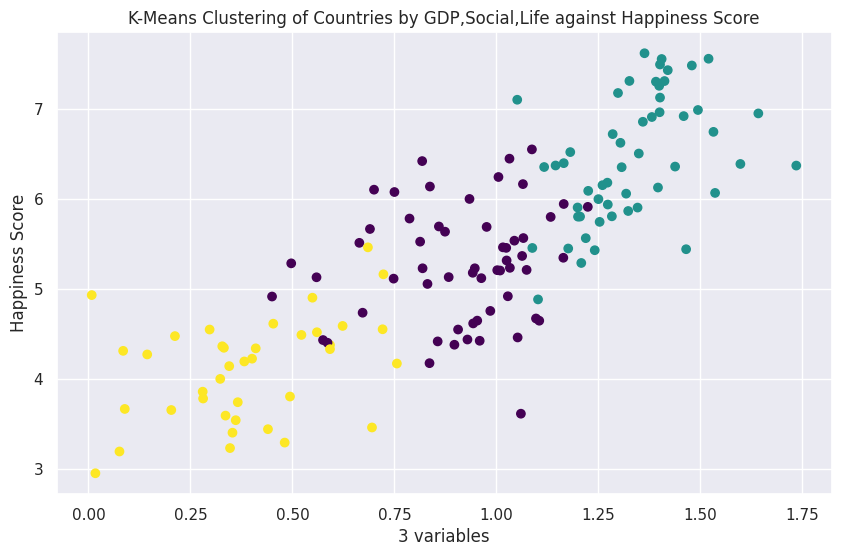

MSE: 0.4115814661916137
RMSE: 0.6415461528149115


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data preparation
X = Updatereport[['Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy']]
y = Updatereport['Happiness score']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled, y)

# Predicting clusters
clusters = kmeans.predict(X_scaled)

# Plotting the clustering result
plt.figure(figsize=(10,6))
plt.scatter(X['Explained by: GDP per capita'], y, c=clusters, cmap='viridis', marker='o')
plt.xlabel('3 variables')
plt.ylabel('Happiness Score')
plt.title('K-Means Clustering of Countries by GDP,Social,Life against Happiness Score')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y is a pandas series and clusters are the cluster labels for each sample in y

# First, you'll need to assign a happiness score to each cluster.
# This will be the mean happiness score of the points in each cluster.
clustered_happiness_scores = {}
for cluster in np.unique(clusters):
    clustered_happiness_scores[cluster] = y[clusters == cluster].mean()

# Now predict the happiness score for each sample in X using the cluster's happiness score
y_pred = np.array([clustered_happiness_scores[cluster] for cluster in clusters])

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


#### The K-means diagram above aligns with our expectations that the 3 variables are useful in predicting 'Happiness Score', showing a positive correlation. 

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Specify the number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Analyze cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate feature importance-like scores
feature_importance_scores = cluster_centers.std(axis=0)

# Create a DataFrame to display feature importance-like scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print (importance_df)


                                 Feature  Importance
0           Explained by: GDP per capita    0.379413
1           Explained by: Social support    0.231261
2  Explained by: Healthy life expectancy    0.211171
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


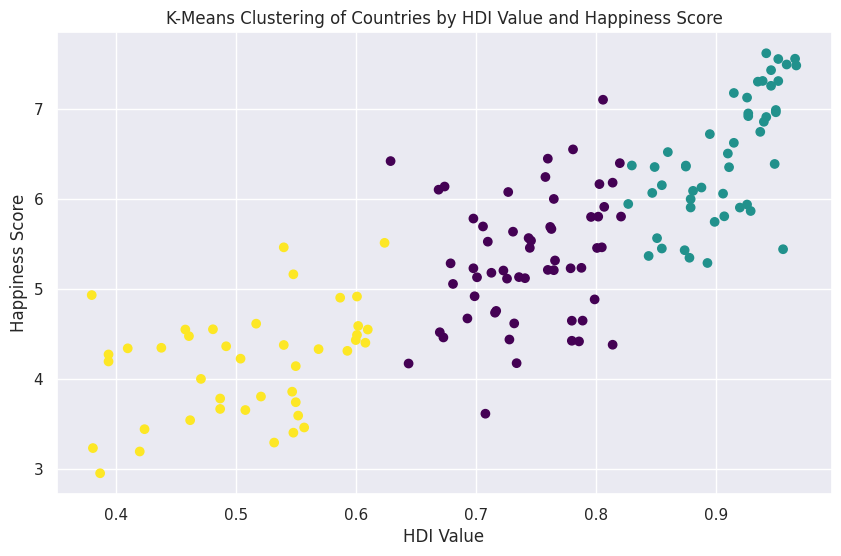

MSE: 0.44940827971356295
RMSE: 0.6703792059077929


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data preparation
X = Updatereport[['HDI Value']]
y = Updatereport['Happiness score']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled, y)

# Predicting clusters
clusters = kmeans.predict(X_scaled)

# Plotting the clustering result
plt.figure(figsize=(10,6))
plt.scatter(X['HDI Value'], y, c=clusters, cmap='viridis', marker='o')
plt.xlabel('HDI Value')
plt.ylabel('Happiness Score')
plt.title('K-Means Clustering of Countries by HDI Value and Happiness Score')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y is a pandas series and clusters are the cluster labels for each sample in y

# First, you'll need to assign a happiness score to each cluster.
# This will be the mean happiness score of the points in each cluster.
clustered_happiness_scores = {}
for cluster in np.unique(clusters):
    clustered_happiness_scores[cluster] = y[clusters == cluster].mean()

# Now predict the happiness score for each sample in X using the cluster's happiness score
y_pred = np.array([clustered_happiness_scores[cluster] for cluster in clusters])

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


#### We used the HDI Value as the feature for clustering and the Happiness score as the target variable to be predicted.

#### Firstly, we scaled the HDI values using the StandardScaler to ensure the clustering algorithm performs optimally by normalizing the range of the data.

#### Secondly, we applied the k-means clustering algorithm to the scaled HDI values, specifying three clusters. This helped in identifying three groups of countries based on their HDI similarities.

#### We then predicted the cluster for each data point (country) based on their scaled HDI value, and visualized the clustering outcome by plotting the original HDI values against the happiness scores, using different colors to distinguish the clusters. 

#### We then calculated the mean happiness score for each cluster, which represents the average happiness score of countries grouped together based on similar HDI values.

#### Using the mean happiness scores of clusters, you predicted the happiness score for each country based on its cluster membership.

#### Finally, we then calculated the mean squared error (MSE) and the root mean squared error (RMSE) between the actual happiness scores and your predictions to evaluate the accuracy of using clustered HDI values to predict happiness scores.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Specify the number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Analyze cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate feature importance-like scores
feature_importance_scores = cluster_centers.std(axis=0)

# Create a DataFrame to display feature importance-like scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
0  HDI Value    0.162967
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0674b5d1-0671-4d0f-ad7c-f1e1b27d9175' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>